In [2]:
# Import Packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [23]:
# Notation: 
# x_k1 = x_{k+1}, x_k = x_{k},  y_k = y_{k}, s_k = s_{k}, d_k = d_{k}
# B_k1 = B_{k+1}

#-----------------------------------------------------------------------------#
#                   Local Quasi-Newton with BFGS                              #
#-----------------------------------------------------------------------------#
def bfgs_min(x0, B0, grad_f, tol, maxiter=None):
    """Approximates the unconstrained local minimizer of a real valued 
    function f:R^n -> R  with local quasi-Newton Method using BFGS updating of the 
    quasi-Hessian.

    Parameters
    ----------
    x_0 : array
        Starting value for the interation
    B0 : matrix
        Starting value for the quasi-hessian
    grad_f: function
        Gradient of the function to minimize
    tol: float
        Tolerance for the convergence
    maxiter: int
        Maximimum number of iterations   

    Returns
    -------
    iter: int
        Number of iterations
    x_k: array
        Approximation of local minimizer after k interations
    """

    if maxiter is None:
        maxiter = 100
    if np.array_equal(B0, B0.T)==False:
        raise ValueError("The matrix B0 is not symmetrix.")
    if np.all(np.linalg.eigvals(B0) > 0)==False:
        raise ValueError("The matrix B0 is not postive definite.")


    # Initialize the loop by initial conditions
    B_k = B0;
    x_k = x0; 
    iter = 0
    
    while np.linalg.norm(grad_f(x_k)) > tol:
    
        s_k = - np.dot(B_k, grad_f(x_k)); 
        x_k1 = x_k + s_k; 
    
        if np.linalg.norm(grad_f(x_k1)) > tol: 
            d_k = s_k; 
            y_k = grad_f(x_k1) - grad_f(x_k);
        
            if np.dot(y_k,d_k)<=0:
                break; 
    
            A1 = d_k - np.dot(B_k,y_k);
            b1 = np.dot(d_k,y_k); 
            B_k1 = B_k + ((np.outer(A1 ,d_k) + np.outer(d_k, A1))/b1) \
            - (1.0/(b1**2))*np.dot(A1,y_k)*np.outer(d_k,d_k);
            # Update the matrix
            B_k = B_k1; 
        
        x_k = x_k1;
        print("Iteration:", iter)
        print(x_k)
        iter = iter + 1 
        if iter >= maxiter:
            print("Maximum number of iterations reached")
            break
        
    return iter,x_k; 
#-----------------------------------------------------------------------------#

In [11]:
#-----------------------------------------------------------------------------#      
#                            Zielfunktion
#-----------------------------------------------------------------------------#
def f(x,y): 
   y = (x-2)**4 + (y**2)*(x-2)**2 + (y+1)**2
   return y; 
#-----------------------------------------------------------------------------#

#-----------------------------------------------------------------------------#      
#                       Gradient der Zielfunktion
#-----------------------------------------------------------------------------#
def grad_f(x):  
    gradient = np.array([ 4*((x[0]-2)**3) + 2*(x[0]-2)*(x[1]**2), 2*x[1]*((x[0]-2)**2) + 2*(x[1]+1) ]); 
    return gradient;  
# grad_f = lambda x: np.array([ 4*((x[0]-2)**3) + 2*(x[0]-2)*(x[1]**2), 2*x[1]*((x[0]-2)**2) + 2*(x[1]+1) ]);
#-----------------------------------------------------------------------------#

In [24]:
#=============================================================================#
# MAIN  
# AUFGABE 2a)
    
# Setzen des Startvektors, Anfangsmatrix, Toleranz
x0 = np.array([1,1]); 
B0 = np.array([[1,0], [0,1]]); 
tol = 1e-6;

iter, x_min = bfgs_min(x0, B0, grad_f, tol)



Iteration: 0
[ 7 -5]
Iteration: 1
[-0.42754325 -3.36069204]
Iteration: 2
[20.94258199 79.30248714]
Iteration: 3
[-0.59468473 -2.47749548]
Iteration: 4
[-0.71215741 -1.84089302]
Iteration: 5
[-0.87651232 -0.86601921]
Iteration: 6
[-0.82767016 -1.04159513]
Iteration: 7
[-0.62003102 -1.47720494]
Iteration: 8
[-0.17979325 -1.97821824]
Iteration: 9
[ 0.4437476  -2.32630217]
Iteration: 10
[ 1.05643826 -2.50491673]
Iteration: 11
[ 1.5701675  -2.59944303]
Iteration: 12
[ 1.86812692 -2.58425101]
Iteration: 13
[ 1.97354999 -2.45346569]
Iteration: 14
[ 2.12742719 -1.90530242]
Iteration: 15
[ 2.21656999 -1.16226459]
Iteration: 16
[ 2.21307418 -0.97789627]
Iteration: 17
[ 2.18752546 -0.96454429]
Iteration: 18
[ 2.03922301 -0.98485954]
Iteration: 19
[ 1.99809753 -1.00231273]
Iteration: 20
[ 2.00029892 -1.00038024]
Iteration: 21
[ 2.00010637 -1.00012091]
Iteration: 22
[ 2.00000014 -0.99999999]


In [21]:
print("Approximative Lösung nach",iter, "Iterationen ist", x_min);

Approximative Lösung nach 23 Iterationen ist [ 2.00000014 -0.99999999]


Approximative Lösung nach 23 Iterationen ist [ 2.00000014 -0.99999999]


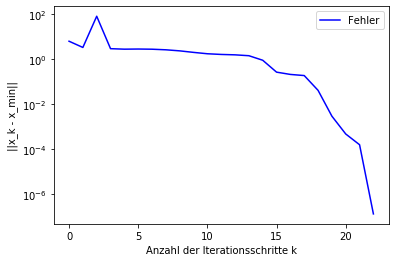

No handles with labels found to put in legend.


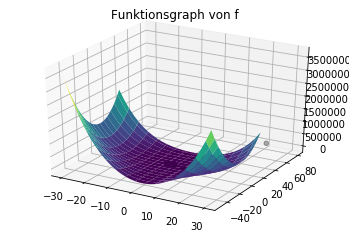

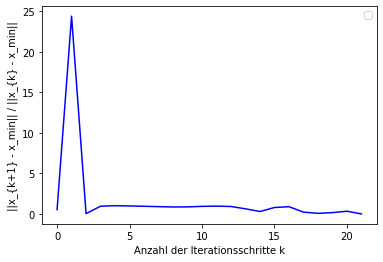

In [9]:
counter = 0; 

error = [];
#iterierte = np.empty([2,1]); 
iterierte = []; 
x_min = np.array([2,-1]);  
B_k = B0;
x_k = x0; 

while np.linalg.norm(grad_f(x_k)) > tol:
    
    s_k = - np.dot(B_k, grad_f(x_k)); 
    x_k1 = x_k + s_k; 
    
    if np.linalg.norm(grad_f(x_k1)) > tol: 
        d_k = s_k; 
        y_k = grad_f(x_k1) - grad_f(x_k);
        
        if np.dot(y_k,d_k)<=0:
            break; 
    
        A1 = d_k - np.dot(B_k,y_k);
        b1 = np.dot(d_k,y_k); 
        H_k = B_k + ((np.outer(A1 ,d_k) + np.outer(d_k, A1))/b1) \
            - (1.0/(b1**2))*np.dot(A1,y_k)*np.outer(d_k,d_k); 
           
    B_k = H_k; 
    x_k = x_k1;
    
    error.append(np.linalg.norm(x_k - x_min));
    iterierte.append(x_k); 
    counter = counter + 1; 
    
print("Approximative Lösung nach",counter, "Iterationen ist", x_k);
iterierte = np.reshape(iterierte, (counter,-1)).T;  


# AUFGABE 2b)
# Plot des Fehlers
plt.figure(1); 
plt.semilogy(range(0,len(error)), error,  "-b", label = "Fehler");
plt.legend(loc="upper right");
plt.xlabel('Anzahl der Iterationsschritte k'); 
plt.ylabel(" ||x_k - x_min|| "); 
plt.show();


# Plot des Graphen
x = np.linspace(-30, 30, 30); 
y = np.linspace(-50, 30, 30);
X, Y = np.meshgrid(x, y);
Z = f(X, Y);
plt.figure(2); 
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                cmap='viridis', edgecolor='none');
ax.scatter(iterierte[0,:],iterierte[1,:], color='black'); 
ax.set_title('Funktionsgraph von f');


# Zur Konvergenzgeschwindigkeit des Verfahren
error_ratio = []; 
for i in range(0, len(error)-1): 
    error_ratio.append( error[i+1]/error[i]);
    
# Plot des Fehlers
plt.figure(3); 
plt.plot(range(0,len(error_ratio)), error_ratio,  "-b");
plt.legend(loc="upper right");
plt.xlabel('Anzahl der Iterationsschritte k'); 
plt.ylabel(" ||x_{k+1} - x_min|| / ||x_{k} - x_min|| "); 
plt.show();

# Kommentar: Nach Plot 3 wird ersichtlich, dass das Verfahren mindestens linear 
# konvergiert, da es ein K>0 gibt sodass error(k+1)/error(k) < gamma für k>=K mit 0 < gamma < 1. 